# Project SonicSpectrum

Authors: **Joshua Mukisa**

This Jupyter Notebook contains code dedicated to applying Fast Fourrier Transforms (FFT) to an audio file, and visualising it in a sinusoidal graph.

Audio File Name: **Pirates of the Caribbean - He's a Pirate.mp3**

FFT (Fast Fourier Transform) is an algorithm used to compute the discrete Fourier transform efficiently.

The Discrete Fourier Transform (DFT) is mathematically represented as follows:

$$X_k = \sum_{m=0}^{n-1} x_m \cdot e^{-i \frac{2\pi k m}{n}} \quad \text{for} \quad k = 0, 1, \ldots, n-1$$

In this expression:

- $X_k$ represents the $k$-th element of the DFT output.
- $x_m$ denotes the $m$-th element of the input sequence.
- $e^{-i \frac{2\pi k m}{n}}$ is the complex exponential term, where $e$ is the base of the natural logarithm, $i$ is the imaginary unit, and $\pi$ is the mathematical constant pi.

Additionally, $e^{i\frac{2\pi}{n}}$ corresponds to a primitive $n$-th root of 1. This term is crucial in the computation of the DFT, as it defines the angular frequency associated with each frequency component.


# Import necessary libraries


In [10]:
import librosa
import numpy as np
from numpy.fft import fft
import matplotlib.pyplot as plt
import os
import IPython.display as ipd
import pandas as pd

# Loading and processing audio


In [ ]:
def load_and_process_audio(file_path):
    """
    Load an MP3 file and process it for further signal processing.

    Parameters:
    - file_path (str): Path to the MP3 file.

    Returns:
    - audio_data (np.ndarray): Processed audio data.
    - sr (int): Actual sample rate of the loaded audio.
    """
    # Load the audio file
    audio_data, sr = librosa.load(file_path)

    return audio_data, sr

BASE_DIR = '../data' # directory containing the sound file
file_name = "Pirates-5secinterval.m4a" # the name of the sound file

file_path = os.path.join(BASE_DIR, file_name)  # The file path to the sound file
audio_data, sr = load_and_process_audio(file_path) # Split the sound file into the intensity and sample rate

# Plot frequency spectrum


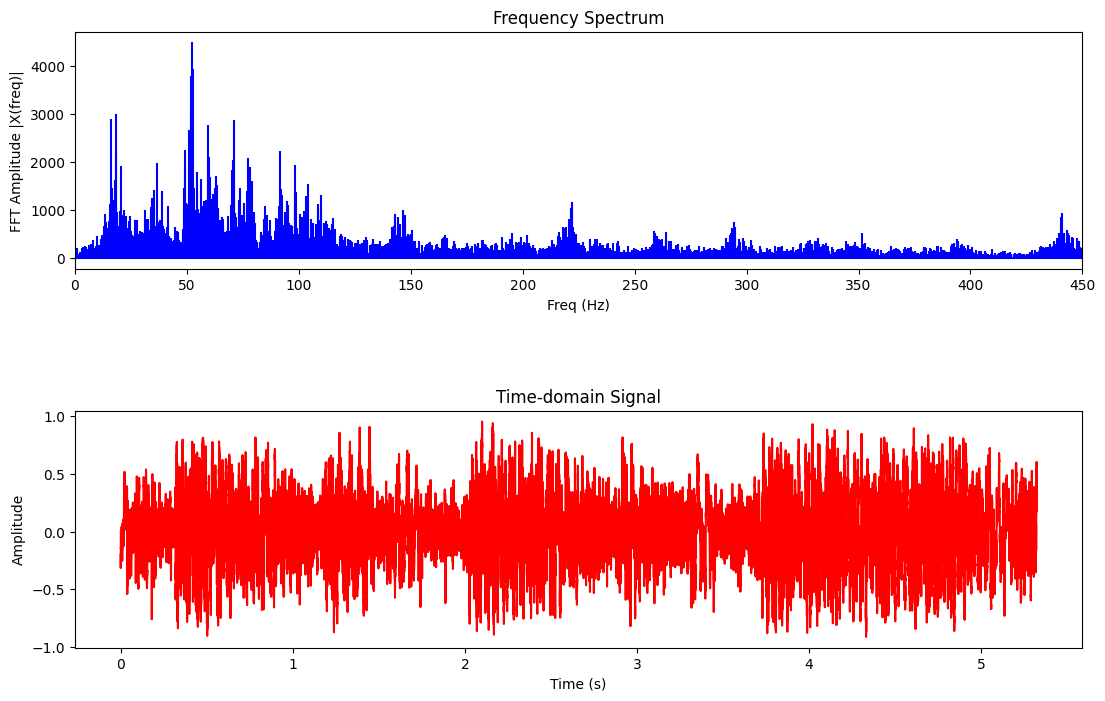

 Frequency   Amplitude
 15.972406 2901.722032
 18.415244 3001.591812
 51.111698 2660.815472
 51.675430 3783.564088
 51.863341 2673.143776
 52.051251 3083.064845
 52.239162 4488.680778
 52.427073 2628.260932
 52.802894 3932.635825
 59.379767 2776.270321
 71.030228 2871.121884


In [12]:
def plot_frequency_spectrum(audio_data, sr):
    """
    Perform FFT on the processed audio data and plot the frequency spectrum.

    Parameters:
    - audio_data (np.ndarray): Processed audio data.
    - sr (int): Sample rate of the audio data.

    Returns:
    None
    """
    # Perform FFT (Fourier Transforms)
    X = fft(audio_data)
    N = len(X)
    n = np.arange(N)
    T = N / sr
    freq = n / T
    df = pd.DataFrame({'Frequency':freq, "Amplitude":np.abs(X)})
    threshold_percentage = 0.5
    prominent_frequencies = df[(df['Frequency'] < 150) & (df['Amplitude'] > threshold_percentage*max(np.abs(X)))]

    # Plot frequency spectrum
    plt.figure(figsize=(13, 8))
    
    # Subplot 2: Frequency Spectrum
    plt.subplot(211)
    plt.stem(freq, np.abs(X), 'b', markerfmt=" ", basefmt="-b")
    plt.xlabel('Freq (Hz)')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.title('Frequency Spectrum')
    plt.xlim(0, 450)  # Adjust the frequency range as needed
    
    
    # Subplot 1: Time-domain Signal
    plt.subplot(212)
    plt.plot(np.arange(len(audio_data)) / sr, audio_data, 'r')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Time-domain Signal')
    
    # Adjust layout for better visualization
    plt.subplots_adjust(hspace=0.6)  # Add spacing between subplots
    
    # Display the plot
    plt.show()
    print(prominent_frequencies.to_string(index=False))


plot_frequency_spectrum(audio_data, sr)
